In [1]:
# 코드를 돌릴 때 warning이 안나오게 하기
import warnings
warnings.filterwarnings('ignore')

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [16]:
# 영상에서는 fin_statement_2005_2017.csv이지만(데이터 문제가 있는 파일), 
# 해당 데이터에서 문제를 발견하여, fin_statement_new.csv라는 데이터(2006 ~ )로 대체되었습니다
df = pd.read_csv("my_data/fin_statement_new.csv")
df.head()

,Code,Name,결산월,상장일,시가총액,유통시가총액,"P/E(Adj., FY End)","P/B(Adj., FY End)","P/S(Adj., FY End)","P/FCF1(Adj., FY End)",EV/EBITDA,EV/EBIT,"DPS(보통주, 현금+주식, 연간)",year,수정주가,ROA,비유동부채,자산총계
0,A000020,동화약품,12,19760324,113122453500.000,65520525067.000,11.230,0.550,0.560,4.390,3.480,4.390,600.000,2006,6460,3.810,11961630.000,195293494.000
1,A000040,KR모터스,12,19760525,144125742600.000,111855988832.000,97.070,1.440,0.820,-7.780,16.840,40.670,0.000,2006,1098,-21.980,28190608.000,81250312.000
2,A000050,경방,12,19560303,275600000000.000,180269960000.000,426.230,0.860,2.010,5.780,15.340,20.660,0.000,2006,10339,-1.800,17344611.000,515345506.000
3,A000070,삼양홀딩스,12,19681227,602432236800.000,281576827480.000,8.360,0.570,0.530,11.160,4.600,6.210,1050.000,2006,63563,5.490,60878366.000,973804019.000
4,A000100,유한양행,12,19621101,1382097577000.000,1018467704491.000,25.280,2.670,4.070,-27.990,15.720,17.160,1000.000,2006,24911,7.530,95212024.000,746417156.000


In [17]:
df = df.drop(["상장일"], axis=1)

In [18]:
df = df.rename(columns={
    "DPS(보통주, 현금+주식, 연간)": "DPS",
    "P/E(Adj., FY End)": "PER",
    "P/B(Adj., FY End)": "PBR",
    "P/S(Adj., FY End)": "PSR",
})

In [7]:
# 새로 올린 데이터는 2005가 아닌 2006부터 데이터가 존재합니다.
df.groupby(['year'])['Name'].count() # 상장폐지, 새로운 상장 등이 포함된 결과.
df.groupby(['Name'])['year'].count() # 각 회사의 연 데이터가 몇개 있나? 

year
2006    1479
2007    1538
2008    1606
2009    1636
2010    1623
2011    1634
2012    1653
2013    1643
2014    1655
2015    1692
2016    1771
2017    1838
Name: Name, dtype: int64

Name
3S        12
3SOFT      4
3노드디지탈     6
AD모터스      7
AJS        9
          ..
흥국         8
흥국에프엔비     2
흥아해운      12
희림        12
희훈디앤지      4
Name: year, Length: 2241, dtype: int64

In [8]:
yearly_price_df = df.pivot(index="year", columns="Name", values="수정주가")
yearly_price_df

Name,3S,3SOFT,3노드디지탈,AD모터스,AJS,AJ네트웍스,AJ렌터카,AK홀딩스,APS홀딩스,AP시스템,...,휴온스,휴온스글로벌,휴젤,휴켐스,흥구석유,흥국,흥국에프엔비,흥아해운,희림,희훈디앤지
year,,,,,,,,,,,,,,,,,,,,,
2006,830.000,6530.000,NaN,1997.000,1250.000,NaN,NaN,12960.000,2940.000,NaN,...,NaN,NaN,NaN,5356.000,1976.000,NaN,NaN,1979.000,2941.000,1212.000
2007,686.000,5410.000,NaN,1600.000,2200.000,NaN,NaN,26015.000,2607.000,NaN,...,NaN,6385.000,NaN,11430.000,3393.000,NaN,NaN,3011.000,8072.000,1120.000
2008,524.000,930.000,799.000,244.000,835.000,NaN,NaN,8859.000,2566.000,NaN,...,NaN,4538.000,NaN,13179.000,2420.000,NaN,NaN,1053.000,7687.000,210.000
2009,1163.000,5.000,1770.000,911.000,2820.000,NaN,NaN,10362.000,3185.000,NaN,...,NaN,5549.000,NaN,18336.000,2660.000,NaN,NaN,1151.000,11000.000,5.000
2010,3237.000,NaN,1840.000,718.000,1740.000,NaN,NaN,22039.000,5692.000,NaN,...,NaN,4206.000,NaN,19600.000,2320.000,2190.000,NaN,1935.000,8320.000,NaN
2011,24852.000,NaN,912.000,389.000,1125.000,NaN,NaN,25444.000,9685.000,NaN,...,NaN,5494.000,NaN,19950.000,1500.000,2335.000,NaN,1216.000,6310.000,NaN
2012,7160.000,NaN,865.000,69.000,891.000,NaN,NaN,21516.000,5424.000,NaN,...,NaN,9111.000,NaN,25900.000,1585.000,1927.000,NaN,1571.000,6880.000,NaN
2013,4440.000,NaN,1200.000,NaN,620.000,NaN,12350.000,39689.000,7346.000,NaN,...,NaN,27403.000,NaN,24000.000,2000.000,2040.000,NaN,2230.000,5710.000,NaN
2014,2395.000,NaN,NaN,NaN,33.000,NaN,16300.000,80200.000,4544.000,NaN,...,NaN,37199.000,NaN,25100.000,2165.000,1737.000,NaN,4977.000,4660.000,NaN


In [9]:
# 1. year_price_df.pct_change() == year_price_df / year_price_df.shift() - 1
# 2. `shift(-1)`을 하는 이유? 
#    - 데이터를 "xx년도에서 1년동안 들고있었더니, xx만큼 수익이 났다"로 해석하고 싶기 때문
# fill_method를 설정하지 않으면 기본값인 pad가 작동하여 가장 최근 값으로 채워버린다.
# 그러면 결국 변화량이 없어 0으로 채워질 것.
yearly_rtn_df = yearly_price_df.pct_change(fill_method=None).shift(-1)
yearly_rtn_df.head()

Name,3S,3SOFT,3노드디지탈,AD모터스,AJS,AJ네트웍스,AJ렌터카,AK홀딩스,APS홀딩스,AP시스템,...,휴온스,휴온스글로벌,휴젤,휴켐스,흥구석유,흥국,흥국에프엔비,흥아해운,희림,희훈디앤지
year,,,,,,,,,,,,,,,,,,,,,
2006,-0.173,-0.172,NaN,-0.199,0.760,NaN,NaN,1.007,-0.113,NaN,...,NaN,NaN,NaN,1.134,0.717,NaN,NaN,0.521,1.745,-0.076
2007,-0.236,-0.828,NaN,-0.848,-0.620,NaN,NaN,-0.659,-0.016,NaN,...,NaN,-0.289,NaN,0.153,-0.287,NaN,NaN,-0.650,-0.048,-0.812
2008,1.219,-0.995,1.215,2.734,2.377,NaN,NaN,0.170,0.241,NaN,...,NaN,0.223,NaN,0.391,0.099,NaN,NaN,0.093,0.431,-0.976
2009,1.783,NaN,0.040,-0.212,-0.383,NaN,NaN,1.127,0.787,NaN,...,NaN,-0.242,NaN,0.069,-0.128,NaN,NaN,0.681,-0.244,NaN
2010,6.677,NaN,-0.504,-0.458,-0.353,NaN,NaN,0.154,0.702,NaN,...,NaN,0.306,NaN,0.018,-0.353,0.066,NaN,-0.372,-0.242,NaN


In [12]:
quant_series = df.groupby(['year'])['시가총액'].quantile(0.2)

In [19]:
df = df.join(quant_series, how='left', on='year', rsuffix="_quantile")
df

,Code,Name,결산월,시가총액,유통시가총액,PER,PBR,PSR,"P/FCF1(Adj., FY End)",EV/EBITDA,EV/EBIT,DPS,year,수정주가,ROA,비유동부채,자산총계,시가총액_quantile
0,A000020,동화약품,12,113122453500.000,65520525067.000,11.230,0.550,0.560,4.390,3.480,4.390,600.000,2006,6460,3.810,11961630.000,195293494.000,24661836580.000
1,A000040,KR모터스,12,144125742600.000,111855988832.000,97.070,1.440,0.820,-7.780,16.840,40.670,0.000,2006,1098,-21.980,28190608.000,81250312.000,24661836580.000
2,A000050,경방,12,275600000000.000,180269960000.000,426.230,0.860,2.010,5.780,15.340,20.660,0.000,2006,10339,-1.800,17344611.000,515345506.000,24661836580.000
3,A000070,삼양홀딩스,12,602432236800.000,281576827480.000,8.360,0.570,0.530,11.160,4.600,6.210,1050.000,2006,63563,5.490,60878366.000,973804019.000,24661836580.000
4,A000100,유한양행,12,1382097577000.000,1018467704491.000,25.280,2.670,4.070,-27.990,15.720,17.160,1000.000,2006,24911,7.530,95212024.000,746417156.000,24661836580.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19763,A900290,GRT,6,213915625000.000,131194452813.000,NaN,0.000,NaN,NaN,NaN,NaN,72.000,2017,3335,NaN,NaN,NaN,61753217430.000
19764,A900300,오가닉티코스메틱,12,187283250000.000,104092030350.000,6.520,1.550,1.350,11.960,3.680,3.820,47.000,2017,3030,31.910,NaN,NaN,61753217430.000
19765,A950110,SBI핀테크솔루션즈,3,215744725000.000,59523969628.000,22.220,2.790,1.010,5.560,-0.210,-0.260,NaN,2017,7200,4.220,4972417.000,30428841.000,61753217430.000
19766,A950130,엑세스바이오,12,139925688100.000,102145752313.000,544.570,2.880,5.100,-8.740,77.250,-1351.730,NaN,2017,4580,0.590,2134312.000,65728187.000,61753217430.000


In [51]:
quantile_selected_df = df[df['시가총액'] <= df['시가총액_quantile']]
quantile_selected_df

,Code,Name,결산월,시가총액,유통시가총액,PER,PBR,PSR,"P/FCF1(Adj., FY End)",EV/EBITDA,EV/EBIT,DPS,year,수정주가,ROA,비유동부채,자산총계,시가총액_quantile
21,A000440,중앙에너비스,12,15198600000.000,5828663100.000,12.560,0.370,0.170,15.080,7.600,10.190,800.000,2006,5234,3.470,4359080.000,51819700.000,24661836580.000
34,A000760,이화산업,12,11158000000.000,5161690800.000,-0.980,0.270,0.180,-9.360,-5.830,-5.530,0.000,2006,3965,-9.840,1457925.000,93661256.000,24661836580.000
40,A000910,유니온,12,19769831000.000,8811413677.000,22.400,0.320,0.370,5.070,6.730,18.710,500.000,2006,1632,0.660,4516111.000,95440233.000,24661836580.000
44,A001000,신라섬유,12,15450000000.000,8503680000.000,-53.000,1.680,14.950,-13.330,-72.110,-59.790,0.000,2006,1120,0.300,25672808.000,39723341.000,24661836580.000
52,A001140,국보,12,9553927200.000,6067699165.000,258.790,0.550,0.140,3.660,6.750,17.780,0.000,2006,800,0.870,12534042.000,71494973.000,24661836580.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19728,A237750,피앤씨테크,12,60808176000.000,27825821338.000,9.510,1.160,1.710,17.100,3.310,3.460,NaN,2017,8320,20.250,1368725.000,27009394.000,61753217430.000
19731,A238120,로고스바이오,12,55897958200.000,32135736169.000,-31.800,2.510,10.500,-21.670,-31.550,-25.340,NaN,2017,6228,-3.770,530860.000,6960100.000,61753217430.000
19744,A250060,모비스,12,46862508820.000,22156594170.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,1720,15.970,1454551.000,8819202.000,61753217430.000
19754,A900110,이스트아시아홀딩스,12,46282665000.000,32160435429.000,-8.510,0.450,0.750,6.580,3.160,2.520,10.000,2017,686,1.590,NaN,NaN,61753217430.000


In [52]:
PBR_selected_df = quantile_selected_df[quantile_selected_df['PBR'] >= 0.2]
PBR_selected_df.sort_values(by=['PBR'])
selected_df=PBR_selected_df.groupby(['year'])['PBR'].nsmallest(20)

,Code,Name,결산월,시가총액,유통시가총액,PER,PBR,PSR,"P/FCF1(Adj., FY End)",EV/EBITDA,EV/EBIT,DPS,year,수정주가,ROA,비유동부채,자산총계,시가총액_quantile
5518,A038340,유씨아이,12,10419200000.000,4461501440.000,-1.390,0.200,0.200,1.050,93.100,-127.600,0.000,2009,8195,1.480,11079605.000,53050307.000,17405536920.000
3916,A038320,어울림정보,12,7448554800.000,5220692059.000,-0.610,0.200,0.150,20.390,-2.460,-1.940,0.000,2008,1725,-12.170,7684281.000,37110594.000,24283951632.000
11347,A004090,한국석유,12,26240760000.000,13458885804.000,5.440,0.200,0.060,1.790,8.230,9.960,1000.000,2013,48000,1.890,19917465.000,180704762.000,33819166404.000
13255,A013360,일성건설,12,33430678640.000,9373962291.000,-9.260,0.200,0.110,-3.600,23.450,27.690,0.000,2014,569,-5.900,41555633.000,265046571.000,35391903298.400
4002,A042820,어울림 네트,12,12801146445.000,6136869606.000,-0.340,0.200,0.200,-1.380,-2.250,-1.940,0.000,2008,2454,-17.400,4921126.000,32998773.000,24283951632.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11375,A004790,렉스엘이앤지,12,4354248754.000,3791244390.000,-0.540,72.380,1.270,-0.560,-1.250,-1.150,0.000,2013,2280,0.290,10000.000,51192138.000,33819166404.000
3133,A002540,고제,12,15181365440.000,12582315677.000,-0.590,94.850,2.820,-2.310,-1.610,-1.570,0.000,2008,3879,-121.140,3434123.000,27050320.000,24283951632.000
3693,A026260,카테아,12,11095039620.000,9834643119.000,-0.800,96.230,8.780,59.970,-1.130,-1.050,0.000,2008,899284,-54.500,1743738.000,21491421.000,24283951632.000
991,A042870,에코페트로시스템,12,21945548625.000,20203072064.000,-2.070,217.560,6.990,-1.830,-5.260,-4.930,0.000,2006,22074,-83.000,37226.000,7788127.000,24661836580.000


In [66]:
selected_df=selected_df.reset_index()

In [67]:
selected_df

,year,level_1,PBR
0,2006,882,0.220
1,2006,359,0.250
2,2006,433,0.250
3,2006,1012,0.250
4,2006,341,0.260
...,...,...,...
235,2017,18697,0.450
236,2017,18928,0.450
237,2017,19754,0.450
238,2017,18061,0.460


In [ ]:
PBR_selected_df = PBR_selected_df.loc[selected_df['level_1']]

In [69]:
PBR_selected_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 882 to 18351
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Code                  240 non-null    object 
 1   Name                  240 non-null    object 
 2   결산월                   240 non-null    int64  
 3   시가총액                  240 non-null    float64
 4   유통시가총액                240 non-null    float64
 5   PER                   240 non-null    float64
 6   PBR                   240 non-null    float64
 7   PSR                   240 non-null    float64
 8   P/FCF1(Adj., FY End)  232 non-null    float64
 9   EV/EBITDA             240 non-null    float64
 10  EV/EBIT               240 non-null    float64
 11  DPS                   232 non-null    float64
 12  year                  240 non-null    int64  
 13  수정주가                  240 non-null    int64  
 14  ROA                   231 non-null    float64
 15  비유동부채              

In [70]:
asset_on_df=PBR_selected_df.pivot(index='year', columns='Name', values='PBR')

In [71]:
asset_on_df.head()
(asset_on_df.notna()*1).replace(0, np.nan)

Name,CU전자,KD건설,PN풍년,SG충방,경남제약,경인전자,고려산업,광림,국동,국보,...,한창산업,한컴시큐어,현우산업,형지I&C,혜인,화승인더,화신테크,화천기계,휴맥스홀딩스,흥구석유
year,,,,,,,,,,,,,,,,,,,,,
2006,NaN,0.250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.330
2007,NaN,NaN,NaN,0.280,NaN,0.390,NaN,0.330,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,NaN,NaN,0.440,NaN,NaN,NaN,NaN,NaN,NaN,0.430,...,NaN,0.400,NaN,NaN,NaN,0.320,NaN,NaN,NaN,NaN
2009,NaN,NaN,0.250,NaN,NaN,NaN,NaN,NaN,0.240,0.240,...,NaN,NaN,NaN,0.240,NaN,NaN,0.240,NaN,NaN,NaN
2010,NaN,NaN,NaN,NaN,NaN,0.320,0.300,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Name,CU전자,KD건설,PN풍년,SG충방,경남제약,경인전자,고려산업,광림,국동,국보,...,한창산업,한컴시큐어,현우산업,형지I&C,혜인,화승인더,화신테크,화천기계,휴맥스홀딩스,흥구석유
year,,,,,,,,,,,,,,,,,,,,,
2006,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000
2007,NaN,NaN,NaN,1.000,NaN,1.000,NaN,1.000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,1.000,...,NaN,1.000,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN
2009,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,1.000,1.000,...,NaN,NaN,NaN,1.000,NaN,NaN,1.000,NaN,NaN,NaN
2010,NaN,NaN,NaN,NaN,NaN,1.000,1.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,...,1.000,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN
2012,1.000,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
selected_return_df = yearly_rtn_df*asset_on_df

In [73]:
# selected_return_df는 yearly return df와 asset_on_df를 곱한 것.
def get_return_series(selected_return_df):
    rtn_series = selected_return_df.mean(axis=1)
    rtn_series.loc[2005] = 0     # 주의: 영상속의 데이터와는 달리, 새로 업로드 된 데이터는 2006부터 존재하므로
                                 # 2004가 아니라 2005를 0으로 설정한 점에 주의해주세요
    rtn_series = rtn_series.sort_index()

    cum_rtn_series = (rtn_series + 1).cumprod().dropna()
    return rtn_series, cum_rtn_series

In [74]:
def plot_return(cum_rtn_series, rtn_series):
    fig, axes = plt.subplots(nrows=2, figsize=(15, 6), sharex=True)
    axes[0].plot(cum_rtn_series.index, cum_rtn_series, marker='o');
    axes[1].bar(rtn_series.index, rtn_series);
    axes[0].set_title("Cum return(line)");
    axes[1].set_title("Yearly return(bar)");

In [75]:
rtn_series, cum_rtn_series = get_return_series(selected_return_df)

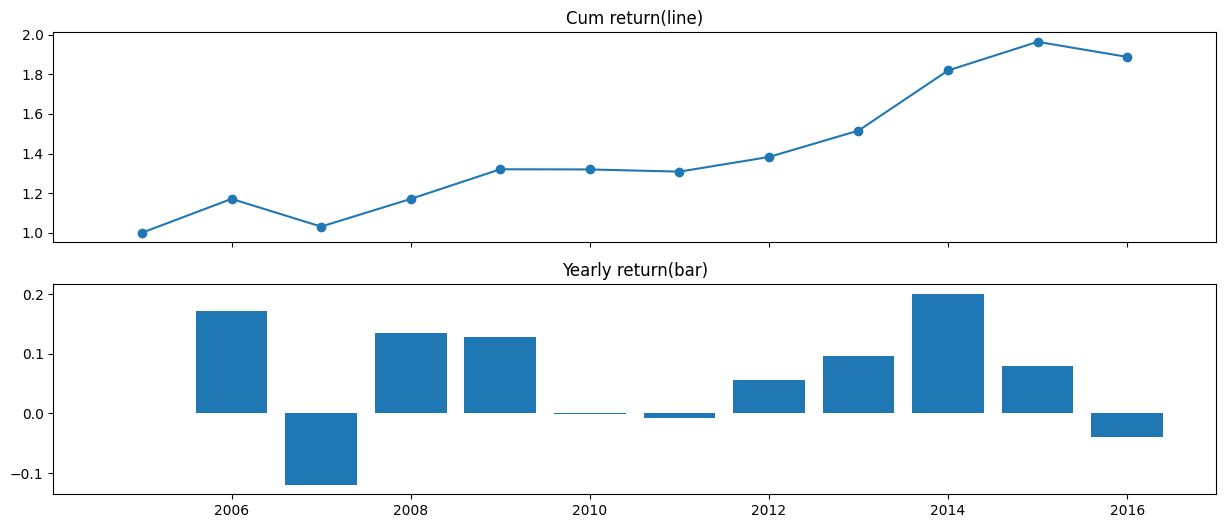

In [76]:
plot_return(cum_rtn_series, rtn_series)